<a href="https://colab.research.google.com/github/gvtsch/gvtsch.github.io/blob/main/MNIST_Beitrag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Was muss passieren, damit ein Neuronales Netz eine handgeschriebene Ziffer erkennt?
## Oder: Wie funktionieren Neuronale Netze?  

Heute möchte ich versuchen, euch zu zeigen oder näher zu bringen, wie ein künstliches Neuronales Netz handschriftlich geschriebene Ziffern zu erkennen.

Wir werden dabei das "Hello World" des maschinellen Lernens betrachten: Der MNIST Datensatz.



### Der MNIST Datensatz
Der MNIST-Datensatz ist eine bekannte Sammlung von handgeschriebenen Ziffern, die für die Entwicklung von Algorithmen zur Erkennung von Schriftzeichen und zur Bildverarbeitung von großer Bedeutung ist. In diesem Kapitel werden wir den MNIST-Datensatz genauer untersuchen und zeigen, wie man ihn mit neuronalen Netzen trainieren kann, um handgeschriebene Ziffern zu erkennen. Wie auch bisher habe ich den Quellcode dafür im Github-Repository abgelegt.

In [ ]:
# Necessary Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
# Load Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


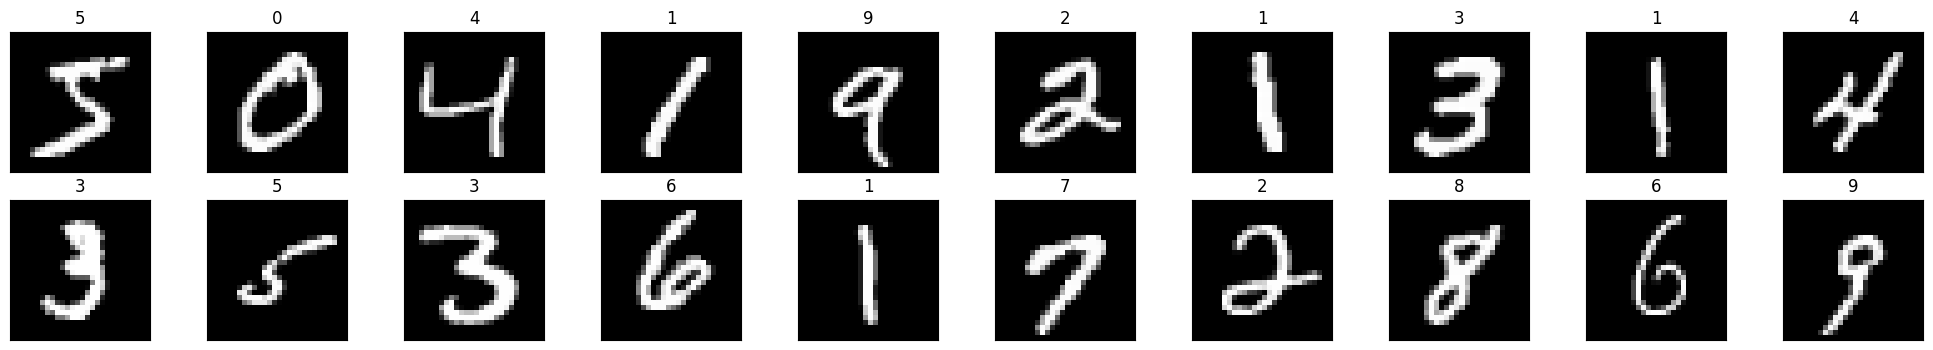

In [ ]:
# Plot some of the digits
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  ax.imshow(x_train[idx], cmap="gray")
  ax.set_title(str(y_train[idx]))

#### Überblick über den MNIST Datensatz
Der MNIST-Datensatz besteht aus insgesamt 70.000 Bildern von handgeschriebenen Ziffern. Davon sind 60.000 Bilder für das Training und 10.000 Bilder für das Testen vorgesehen. Die Bilder sind schwarz-weiß und haben eine Größe von 28x28 Pixeln.

Der Datensatz wurde in den 1990er Jahren von Yann LeCun, Corinna Cortes und Christopher J.C. Burges am Courant Institute of Mathematical Sciences der New York University erstellt. Er wurde entwickelt, um Algorithmen zur Erkennung von handgeschriebenen Ziffern zu trainieren und zu testen.

Die handgeschriebenen Ziffern im Datensatz stammen von einer Vielzahl von Personen und wurden auf Standardformularen geschrieben. Die Ziffern sind in einer zufälligen Reihenfolge angeordnet und besitzen keine besonderen Merkmale oder Muster, die die Erkennung beeinflussen könnten.

Der Datensatz ist ein Standardbenchmark-Datensatz und wird häufig verwendet, um die Leistungsfähigkeit von Algorithmen im Bereich des maschinellen Lernens zu vergleichen. Beim MNIST-Datensatz handelt es sich um ein einfaches und leicht verfügbares Datenset, weshalb es sehr häufig in Tutorials, Schulungen oder ähnlichem genutzt wird.

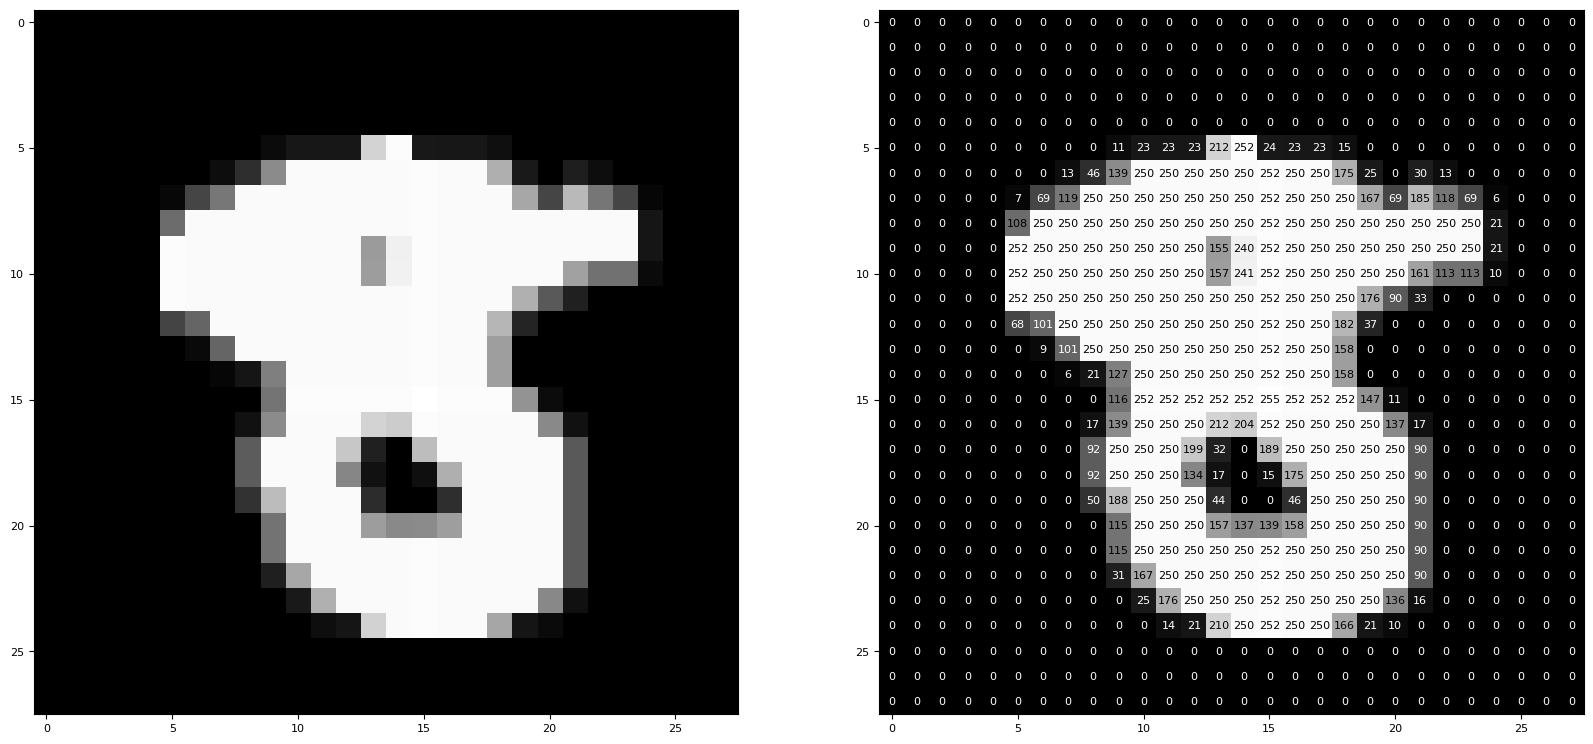

In [ ]:
# Show a random image

plt.rcParams.update({'font.size':8})
rnd = random.randint(0, random.randint(0, len(x_train)))
img = x_train[rnd]

plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

fig = plt.subplot(1,2,2)
ax = fig
img = img
ax.imshow(img, cmap="gray")
width, heigth = img.shape
thrs = img.max()/2.5
for x in range(width):
  for y in range(heigth):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy = (y, x),
                horizontalalignment = "center",
                verticalalignment = "center",
                color = "white" if img[x][y] < thrs else "black")


Das zufällige Bild des Datensatzes hat die erwähnten 28x28 Pixel und ist in Graustufen abgelegt. Als Bild ist es links dargestellt.
Die einzelnen Werte der Graustufen, also die Zahlen die ein jedes Pixel repräsentieren, sind in der rechten Ausgabe dargestellt. Es handelt sich dabei ursprünglich um Werte zwischen 0 und 254, also 8 Bit je Pixel.  Der Wert gibt an, wie hell diese Pixel ist.

Diese Zahlenwerte sind jene, die in das noch zu beschreibende Input-Layer eingespielt werden.

#### **Feature Maps**
Während das obige Bild des MNIST Datensatzes eine Feature Map hat, die Graustufenwerte, sieht das bei farbigen Bildern anders aus. Farbige Bilder haben für jeden Farbkanal eine eigene Feature Map: Rot, Grün, Blau.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*xGj2NQwOpsLpx1Ji.png">
  <figcaption>Die drei Feature Maps eines RGB-Bildes</figcaption>
</figure>

#### **Das Neuronale Netz**
Zurück zu unserem Beispiel: Wir haben also 28 * 28 = 784 Pixel mit jeweils einem Wert. Und diese 784 Pixel gilt es zu analysieren. Unser Gehirn hat gelernt diese Pixel so miteinander zu verknüpfen, dass wir die Zahl ohne weiteres erkennen. Dem Neuronalen Netz müssen wir das noch beibringen.

Wir nehmen also diese 784 Pixel als Eingang für unser Neuronales Netz. Als Ausgang geht aus der Aufgabenstellung hervor, dass wir 10 Ausgänge, die Ziffern 0 bis 9, benötigen.
Die Eingänge oder Eingangs-Ebene bezeichnen wir als Input-Layer, die Ausgänge als Output-Layer. Alles dazwischen sind sogenannte Hidden Layer. Hier wird bereits klar, dass unser Neuronales Netz sinnvoll nur für diese Aufgabe eingesetzt werden kann.

Die Eingangsmatrix von 28x28 transformieren wir zur einfacheren Handhabung zu einem Tensor der Größe 784. Wir haben dann 784 in Reihe angeordnete Pixel bzw. Eingänge, die ihrerseits mit jedem Neuron im folgenden Layer verbunden sind. Jedes einzelne dieser Neuronen ist widerum mit jedem Neuron des folgenden Layers verbunden, bis hin zum Output-Layer. Bei dieser Architektur handelt es sich um das sogenannte **Multilayer Perceptron**.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*9B7vt9e7uNoiSxE__6Be0Q.png", alt="">
  <figcaption>Feedforward Netzwerk bzw. Multilayer Perzeptron. <a href="https://towardsdatascience.com/its-deep-learning-times-a-new-frontier-of-data-a1e9ef9fe9a8">Bildquelle</a></figcaption>
</figure>

> Es gibt auch andere Architekturen, bei denen das so nicht der Fall ist, aber dazu später mehr.

Der Begriff Neuron ist nun so häufig gefallen, dass wir es genauer betrachten sollten.

##### **Das Neuron**
Das Neuron ist ein einfaches künstliches neuronales Netzwerk (ANN — artificial neural network), das in den frühen Tagen der künstlichen Intelligenz (KI) entwickelt wurde. Es ist ein grundlegendes Konzept für maschinelles Lernen und wird oft als Einführung in das Thema der tiefen neuronalen Netze (DNNs) verwendet.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*UK8NOPUsdOMeLB9Q57IzfA.png" alt="Ein Neuron mit Eingabevektor, Bias, Aktivierungsfunktion und Ausgabe">
  <figcaption>Ein Neuron mit Eingabevektor, Bias, Aktivierungsfunktion und Ausgabe</figcapion>
</figure>

Ein Neuron besteht aus einem Eingabevektor x, einem Gewichtungsvektor w und einer Aktivierungsfunktion. Jedem Eingabewert wird ein Gewicht zugewiesen, welches den Einfluss des jeweiligen Werts auf die Ausgabe des Neurons bestimmt. Die Summe aller gewichteten Eingabewerte wird dann durch die Aktivierungsfunktion übertragen, die entscheidet, ob und wie das Neuron „aktiviert“ wird oder nicht. Eine detaillierte Betrachtung von verschiedenen Aktivierungsfunktionen ist ebenfalls in diesem Artikel enthalten. Eine kurze Übersicht findest du in diesem Bild.

<figure>
  <img src="https://www.researchgate.net/profile/Max-Pritzkoleit/publication/335490710/figure/fig1/AS:797522956124160@1567155698415/Abbildung-4-Gaengige-Aktivierungsfunktionen-f-Akt-fuer-die-Verwendung-in-KNN.png" alt="Drei Aktivierungsfunktionen: Sigmoid, tanh und ReLU">
  <figcaption>Drei der gängigsten Aktivierungsfunktionen: Sigmoid, tanh und ReLU</figcaption>
</figure>

Das Neuron kann für eine Vielzahl von Aufgaben trainiert werden, einschließlich Klassifikationen und Regressionen. Im Falle einer Klassifikation wird das Neuron trainiert, um eine Eingabe in eine von mehreren vordefinierten Kategorien einzuordnen. Im Falle einer Regression wird das Neuron trainiert, um eine kontinuierliche Ausgabe auf der Grundlage einer Eingabe vorherzusagen.

Das Training eines Neurons besteht im Wesentlichen darin, die Gewichte anzupassen, um die Vorhersagegenauigkeit des Modells zu verbessern. Dies geschieht durch Verwendung eines Optimierungsalgorithmus wie zum Beispiel das Gradientenabstiegsverfahren (Backpropagation), welches das Neuron auf der Grundlage der Fehler, die es bei der Vorhersage macht, aktualisiert.

Von diesen Neuronen haben wir also 784 im Eingangslayer und 10 im Outputlayer. Es wird das ganze mal in Code zu sehen.

//Die Load-Funktion hat dankenswerterweise bereits die Bilder reshaped, also 28x28 zu 784 Einträgen transformiert.
Falls das nicht der Fall ist, wäre alternativ eine reshape Funktion durchzuführen. Das könnte bspw. so aussehen `x_train = x_train.reshape((-1, 28*28)).astype("float32")/255`. Hier skalieren wir auch direkt auf 255. Das hole ich im folgenden nach.

In [ ]:
print(f"Form von x_train vor dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n")
x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255
#y_train = y_train.reshape((-1, 28 * 28)).astype("float32") / 255

x_test = x_test.reshape((-1, 28 * 28)).astype("float32") / 255

print(f"Form der Daten nach dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n"

SyntaxError: incomplete input (<ipython-input-5-e9f25b5d8acf>, line 9)

##### **One-Hot-Kodierung**
Als nächstes führe ich eine **One-Hot-Kodierung** durch. Die One-Hot-Kodierung ist eine Technik zur Repräsentation von Kategorien als binäre Vektoren. Jede Kategorie erhält einen Vektor, wobei eine Position für die Kategorie steht und alle anderen Positionen Nullen enthalten. Diese Kodierung wird häufig in der Machine-Learning-Modellierung verwendet. Bei unseren handgeschriebenen Ziffern würde jeder Ziffer eine eindeutige Kategorie zugewiesen werden. Eine 0 könnte beispielsweise als `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]` kodiert werden, während eine `1` als `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]` kodiert werden würde, usw.

Gerade bei Klassifizierungsproplemen - wie hier beim MNIST Datensatz - sollten die Ausgabe-Variablen in eine geeignete Form gebracht werden, um sie im Modell verwenden zu können. Durch die Verwendung von One-Hot-Encoding können die Ausgabevariablen effizienter mit dem Modell verwendet werden, da sie als numerische Werte dargestellt werden können. Dies erleichtert die Berechnungen und das Training des Modells.

In [ ]:
x_test = tf.keras.utils.to_categorical(x_test)
y_test = tf.keras.utils.to_categorical(y_test)
print(x_test.shape)

## Backpropagation

## Aktivierungsfunktionen
Auch Aktivierungsfunktionen sind ein wichtiger Bestandteil eines jeden künstlichen neuronalen Netzes. Sie bestimmen, wie das Netzwerk auf bestimmte Eingaben reagiert und tragen maßgeblich zur Leistung und Genauigkeit eines ANNs bei. In diesem Abschnitt werden wir ein paar der am häufigsten in ANNs verwendeten Aktivierungsfunktionen kennenlernen.

Sigmoid-Funktion
Die Sigmoid-Funktion wird oft in binären Klassifikationsproblemen verwendet. Die Funktion verwendet eine S-förmige Kurve, die eine glatte Überlappung zwischen den Klassen ermöglicht. Sie liefert einen Ausgangswert zwischen 0 und 1. Ein Nachteil der Sigmoid-Funktion ist, dass sie anfällig für das Problem des verschwindenden Gradienten (Gradient Vanishing) ist, wenn die Gewichtungen zu groß werden.

Sigmoid Gradient Vanishing beschreibt das Phänomen, dass einzelne Gradienten gegen null gehen. Das liegt daran, dass die Ableitung der Sigmoid-Funktion bei sehr großen oder sehr kleinen Eingaben sehr klein wird. Wenn der Gradient nahe null liegt, kann es zu sehr langsamen oder gestoppten Training des ANNs kommen, weil der Gradient benötigt wird, um die Parameter des ANNs zu aktualisieren. Lösungen können zum Beispiel andere Aktivierungsfunktionen, die ReLU oder die Verwendung von Methoden wie Gradient Clipping oder Batch Normalization sein.
Ein häufiger Use-Case für Sigmoid-Aktivierungsfunktionen findet sich bei binären Klassifikationsproblemen, bei denen das Modell Vorhersagen treffen muss, die entweder „wahr“ oder „falsch“ sind (Ist auf dem Bild ein Hund zu sehen?).

Die Formel für die Sigmoid-Aktivierungsfunktion lautet:


In Python kann man sie folgt abbilden.

import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
Durch Python visualisiert ergeben sich die Sigmoid-Funktion und ihre Ableitung zu diesen Kurven:


Sigmoid-Aktivierungsfunktion mit Ableitung, Bild vom Autor
ReLU (Rectified Linear Unit)
Bei der ReLU-Funktion handelt es sich um eine lineare Funktion, die Null für negative Eingaben und den eingegebenen Wert selbst für positive Eingaben liefert. Daher ist die ReLU-Funktion besonders nützlich, wenn es darum geht, nicht-lineare Funktionen zu lernen. Ein Nachteil der ReLU-Funktion ist jedoch, dass sie anfällig für den Toten Neuronen-Effekt ist, bei dem Neuronen, die einen negativen Ausgang liefern, auf null gesetzt werden und nicht mehr trainiert werden können.

Das Dying ReLU Problem beschreibt den Effekt, wenn ein Neuron im ANN wegen der verwendeten Aktivierungsfunktion keine Aktivierung mehr ausgibt und für alle folgenden Schichten des neuronalen Netzes inaktiv bleibt. Diese Einschränkung kann dazu führen, dass das ANN nicht mehr ordnungsgemäß funktioniert und die Leistung beeinträchtigt wird. Lösungen für dieses Problem können zum Beispiel die Leaky oder Parametric ReLU Aktivierungsfunktion sein. Diese sorgen dafür, dass das Neuron bei negativen Eingaben eine kleine Aktivierung ausgibt. Alternativ kann man das ANN so initialisieren, dass die Gewichte nicht zu stark negativ werden.
Die ReLU-Aktivierungsfunktion ist eine gängige Wahl für Probleme des Deep Learning, bei denen es darum geht, Funktionen zu approximieren, die nicht lineare Beziehungen aufweisen. Ein Beispiel könnte die Vorhersage des Verkaufspreises eines Hauses basierend auf verschiedenen Merkmalen wie Größe, Lage und Alter sein.

Die Formel für die ReLU-Aktivierungsfunktion lautet:


In Python ergibt sich die Formel zu:

import numpy as np
def relu(x):
    return np.maximum(0, x)
Die ReLU-Funktion ihrerseits und ihre Ableitung lässt sich grafisch so darstellen:


ReLU-Aktivierungsfunktion mit Ableitung, Bild vom Autor
Tanh (Hyperbolic Tangent)
Die Tanh-Funktion beschreibt eine der Sigmoid-Funktion ähnliche S-förmige Kurve. Sie liefert jedoch Ausgabewerte zwischen -1 und 1, was sie für Probleme geeigneter macht, bei denen negative Ausgaben möglich sind. Ein Nachteil der Tanh-Funktion ist jedoch, dass sie ebenfalls anfällig für das Problem des verschwindenden Gradienten ist.

Ein gängiger Use-Case für die Tangens hyperbolicus-Aktivierungsfunktion ist bei Problemen des Tiefenlernens, bei denen es darum geht, komplexere Funktionen als die ReLU-Funktion zu approximieren. Ein Beispiel könnte die Vorhersage der Bewegung eines Objekts basierend auf seiner Geschwindigkeit und Beschleunigung sein.

Die Formel für die Tangens hyperbolicus-Aktivierungsfunktion lautet:


Und noch einmal in Python:

import numpy as np
def tanh(x):
    return np.tanh(x)
Die Tanges hyperbolicus-Funktion und ihre Ableitung in einer Grafik:


Tanh-Aktivierungsfunktion mit Ableitung, Bild vom Autor
Es gibt noch weitere Aktivierungsfunktionen, die in künstlichen neuronalen Netzen verwendet werden, aber die oben genannten sind einige der häufigsten. Die Wahl der richtigen Aktivierungsfunktion hängt von der Art des Problems und den Anforderungen an das Modell ab. Es ist wichtig, dass man sich Zeit nimmt, um die verschiedenen Aktivierungsfunktionen zu verstehen und zu vergleichen, um die bestmögliche Leistung für Ihr Problem zu erzielen.

## Arten neuronaler Netze
Neuronale Netze können je nach Architektur und Funktionsweise in verschiedene Arten unterteilt werden. Jede Art hat ihre eigenen Stärken und Schwächen und ist für bestimmte Anwendungen optimiert. In diesem Artikel werden wir uns eingehend mit den verschiedenen Arten von neuronalen Netzen befassen und ihre Eigenschaften und Anwendungen beschreiben.

Feedforward-Netzwerke sind die einfachste Art von neuronalen Netzen und bestehen aus einer Eingangsschicht, einer oder mehreren verborgenen Schichten und einer Ausgangsschicht. Die Daten fließen in einer Richtung durch das Netzwerk, von der Eingangsschicht zur Ausgangsschicht. Feedforward-Netzwerke werden häufig für Klassifizierungsaufgaben eingesetzt, wie zum Beispiel die Erkennung von handgeschriebenen Ziffern.

Feedforward Netzwerk. Bildquelle
Convolutional Neural Networks (CNN) sind auf die Verarbeitung von Bildern spezialisiert und werden häufig für Bilderkennungsaufgaben eingesetzt. Sie bestehen aus mehreren Schichten, darunter Convolutional-Schichten, Pooling-Schichten und vollständig verbundene Schichten. Die Convolutional-Schichten wenden Filter auf die Eingangsbilder an und extrahieren Merkmale. Die Pooling-Schichten reduzieren die Größe der Merkmalskarten bzw. engl. feature maps. Vollständig verbundene Schichten klassifizieren dann die extrahierten Merkmale.

Convolutional Neural Network am Beispiel der Erkennung einer handschriftlichen Ziffer. Bildquelle
Recurrent Neural Networks (RNN) sind auf die Verarbeitung von Sequenzen spezialisiert, wie zum Beispiel Sprache und Zeitreihen. Sie haben eine interne Gedächtnisfunktion, die es ihnen ermöglicht, Informationen aus früheren Schritten zu speichern und in zukünftigen Schritten zu verwenden. RNNs bestehen aus einer oder mehreren Schichten, die mit wiederkehrenden Neuronen verbunden sind.

Recurrent Neural Network. Bildquelle
Long Short-Term Memory (LSTM) Networks sind eine Art von RNNs, die besonders gut für die Verarbeitung von langen Sequenzen geeignet sind. Sie haben eine komplexe Architektur, die es ihnen ermöglicht, Informationen auf lange Sicht zu speichern und zu vergessen. LSTM-Netzwerke werden häufig in der Spracherkennung, Textverarbeitung und Übersetzung eingesetzt.

Neuron eines LSTM-Layers. Bildquelle
Ein weiteres interessantes Konzept ist das Physical Guided Neural Network (PGNN), auch bekannt als Physical Informed Neural Network (PINN). PGNNs nutzen physikalische Gesetze und mathematische Modelle, um das Verhalten eines Systems vorherzusagen. Sie werden häufig in der numerischen Simulation und der Prozessoptimierung eingesetzt, um den Entwurfsprozess zu beschleunigen und zu optimieren. PGNNs erfordern weniger Trainingsdaten als herkömmliche maschinelle Lernmodelle und können die Kosten und die Zeit für die Durchführung von Experimenten erheblich reduzieren. Sie werden in der Strömungsdynamik, der Materialwissenschaft und der Ingenieurwissenschaft eingesetzt, um Prozesse wie Strömung, Wärmeübertragung und mechanische Belastung zu simulieren und zu optimieren.

Physical Guided Neural Network mit Navier Stokes Gleichungen in der Loss-Berechnung. Bildquelle
Je nach Anwendungsfall können verschiedene Arten von Netzen verwendet werden, um das bestmögliche Ergebnis zu erzielen.